There are multiple sources stating that using MSE for sigmoid function will result in non-convex function, which will have several local minima. In this notebook I'm trying to check and visualize this statement

The implementation is based on this question: https://datascience.stackexchange.com/questions/77350/linear-regression-loss-function-for-logistic-regression

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

In [76]:
np.set_printoptions(suppress=True)

In [318]:
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris

## Let's try synthetic data

Let's generate syntehtic data classification problem with 4 features and 2 classes and see whether we can observe multiple minima for MSE loss function.
It is difficult to visualize loss function as a function of several trainable parameters. So we will use fixed bias b and will treat classification problem with one available feature at a time. So we will have loss function J=J(w), where w is a scalar. Thus we will be able to create 2D plot J(w)

In [220]:
X_synthetic, y_synthetic = make_classification(n_features=4)

In [320]:
def mse_loss_plot(X, y, feature_index, xlim=(-100, 100), ylim=None):
    b = 1
    J_list = []
    w_list = []
    for w in np.arange(xlim[0], xlim[1], 0.05):
        J = (1/10000)*np.sum((1/2)*np.square(((1/(1 + np.exp(-1*(w*X[:,feature_index] + b)))) - y)))
        J_list.append(J)
        w_list.append(w)

    fig, ax = plt.subplots()
    sns.lineplot(x=w_list, y=J_list, ax=ax)
    if ylim:
        ax.set_ylim(ylim)
    plt.show()

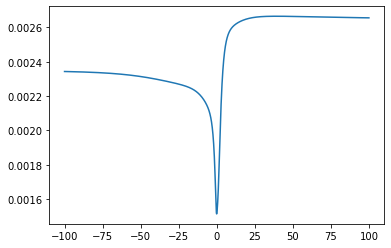

In [222]:
mse_loss_plot(X_synthetic, y_synthetic, 0)

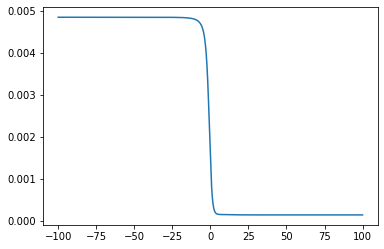

In [223]:
mse_loss_plot(X_synthetic, y_synthetic, 1)

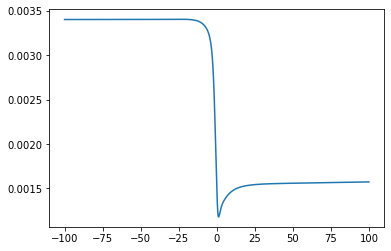

In [224]:
mse_loss_plot(X_synthetic, y_synthetic, 2)

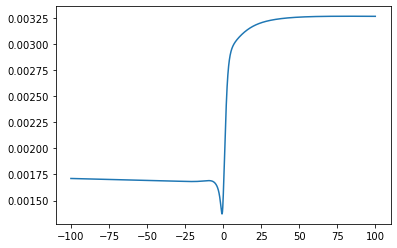

In [225]:
mse_loss_plot(X_synthetic, y_synthetic, 3)

Scale in to see several local minima. The place where to look will change after dataset re-generation

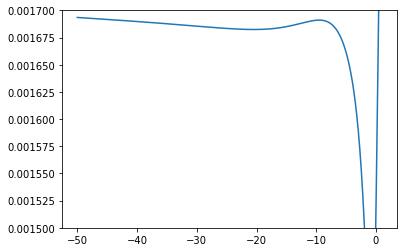

In [227]:
mse_loss_plot(X_synthetic, y_synthetic, 3, xlim=(-50, 1), ylim=(0.0015,0.0017))

Now trying log loss function instead of MSE

In [271]:
def log_loss_plot(X, y, feature_index, xlim=(-100, 100), ylim=None):
    b = 1
    J_list = []
    w_list = []
    for w in np.arange(xlim[0], xlim[1], 0.05):
        yp = 1/(1 + np.exp(-1*(w*X[:,feature_index] + b)))
        #yp[yp<0.00001] = 0.00001
        #yp[yp>0.99999] = 0.99999
        J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))
        J_list.append(J)
        w_list.append(w)

    fig, ax = plt.subplots()
    sns.lineplot(x=w_list, y=J_list, ax=ax)
    if ylim:
        ax.set_ylim(ylim)
    plt.show()

/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))
/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))


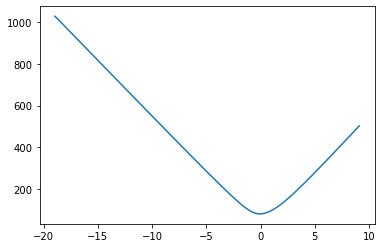

In [273]:
log_loss_plot(X_synthetic, y_synthetic, 0)

/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))
/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))


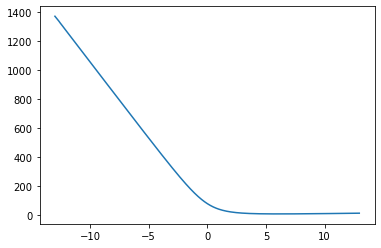

In [274]:
log_loss_plot(X_synthetic, y_synthetic, 1)

/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))
/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))


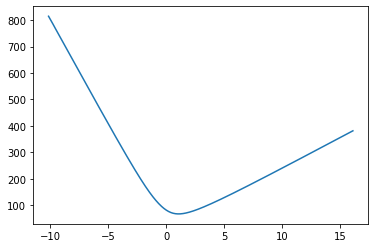

In [275]:
log_loss_plot(X_synthetic, y_synthetic, 2)

/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))
/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))


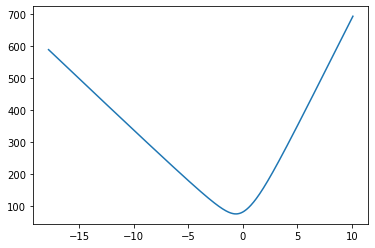

In [276]:
log_loss_plot(X_synthetic, y_synthetic, 3)

## Let's try real data - iris

In [284]:
X_iris, y_iris = load_iris(return_X_y=True)
y_iris[y_iris==2]=0

In [282]:
X_iris.shape

(150, 4)

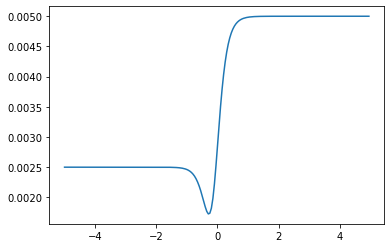

In [288]:
mse_loss_plot(X_iris, y_iris, 0, xlim=(-5,5))

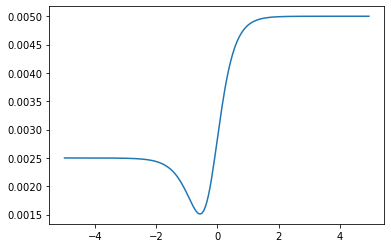

In [289]:
mse_loss_plot(X_iris, y_iris, 1, xlim=(-5,5))

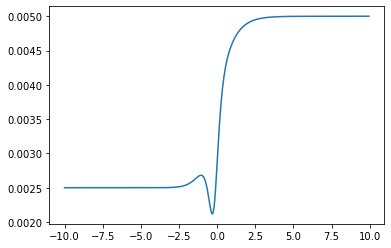

In [309]:
mse_loss_plot(X_iris, y_iris, 2, xlim=(-10,10))

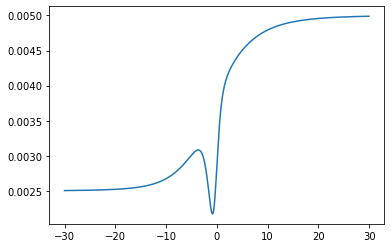

In [310]:
mse_loss_plot(X_iris, y_iris, 3, xlim=(-30,30))

Wow, features 2 and 3 clearly have multiple minima. It seems this is caused by classes not being linearly separable...

<AxesSubplot:>

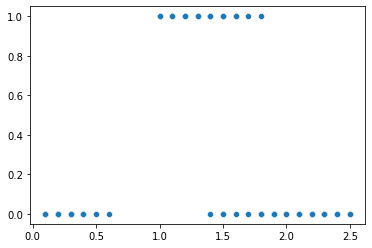

In [311]:
sns.scatterplot(x=X_iris[:,3], y=y_iris)

Let's try log loss on iris now

/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:6: RuntimeWarning: overflow encountered in exp
  yp = 1/(1 + np.exp(-1*(w*X[:,feature_index] + b)))
/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))
/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))


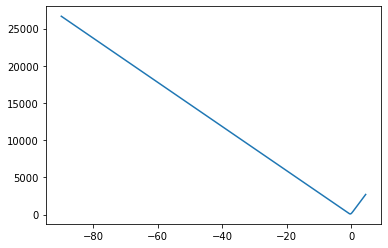

In [312]:
log_loss_plot(X_iris, y_iris, 0)

/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))
/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))


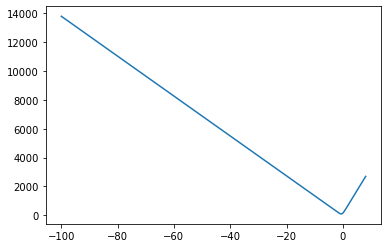

In [313]:
log_loss_plot(X_iris, y_iris, 1)

/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))
/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))


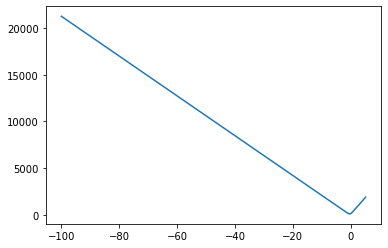

In [314]:
log_loss_plot(X_iris, y_iris, 2)

/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))
/var/folders/93/ts0ltpsn00jgrmshnt6sp1h00000gp/T/ipykernel_1822/3953270468.py:9: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-y*np.log(yp) - (1-y)*np.log(1-yp))


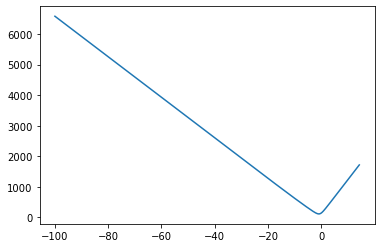

In [321]:
log_loss_plot(X_iris, y_iris, 3)

## Conclusion

When using single sample, MSE from sigmoid doesn't produce several local minima on its own. The problem appears when we start summing up errors from different samples. Also it seems that several local minima for MSE appear when we have non-linearly separable data (see iris features 2 and 3). Log loss haven't produced several local minima in any of the cases.